<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 例題4.3

例題4.2の処理（パーセプトロンの学習規則）をPythonでコーディングせよ．

使用する関数

[numpy.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) 全要素が0のベクトル・行列を作成

[numpy.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) 全要素が1のベクトル・行列を作成

[numpy.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) ベクトル・行列の結合

numpyの@演算子 （[numpy.matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html)と同じ） 行列の積を求める

データの準備と表示

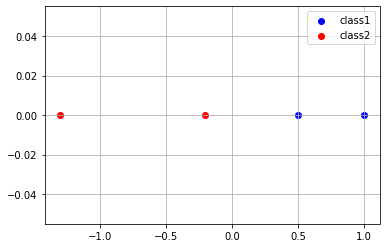

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0], [0.5], [-0.2], [-1.3]])
y = np.array([1, 1, 0, 0])
plt.grid()
plt.scatter(X[y==1], np.zeros(len(X[y==1])), c='blue', label='class1')
plt.scatter(X[y==0], np.zeros(len(X[y==0])), c='red',  label='class2')
plt.legend(loc='upper right')

学習の設定

In [2]:
roh = 0.5
w = np.array([0.2, 0.3])
flag = True
(n, d) = X.shape
X2 = np.concatenate((np.ones((n, d)), X), axis=1)
print(X2)

[[ 1.   1. ]
 [ 1.   0.5]
 [ 1.  -0.2]
 [ 1.  -1.3]]


学習

### 機械学習ライブラリ scikit-learn, mlxtend を利用したコード

使用するクラス、メソッド

[make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) データの生成

[Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) パーセプトロン

[plot_decision_regions](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) 識別面の表示



In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=8)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)


In [ ]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

## 例題4.5

例題4.4の処理を Python でコーディングし、x=(3,4) を識別せよ．

使用する関数

[numpy.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) ノルムを求める

[numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) ソート結果のインデックスを求める

[scipy.stats.mode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) 最頻値を求める

データの準備と表示

In [ ]:
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt

X = np.array([[1,4], [2,3], [4,3], [5,4], [2,1], [3,2], [3,3], [4,1]])
y = np.array([1, 1, 1, 1, 0, 0, 0, 0])
plt.scatter(X[:,0], X[:,1], c=y)

学習の設定

In [ ]:
k = 3
x = np.array([3,4])

k-NN法による識別

### 機械学習ライブラリ scikit-learn を利用したk-NN法のコード

使用するクラス、メソッド

[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=5)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [ ]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

# 解答例

例題4.3

In [ ]:
while flag:
    flag = False
    for (x, t) in zip(X2, y):
        print(f'w = {w}')
        g = x @ w
        if t == 1 and g < 0:
            w = w + roh * x
            flag = True
        elif t == 0 and g > 0:
            w = w - roh * x
            flag = True
    print('-----') 
print(f'result: {w}')

In [ ]:
clf = Perceptron(eta0 = 0.1, random_state=3)
clf.fit(X, y)

例題4.5

In [ ]:
mode_val, mode_num = mode(y[np.argsort(np.linalg.norm(X - x, axis=1))][:k])
print(f'result = {mode_val}')

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)